# EDA - SALARIOS

## Librerías

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import squarify
from wordcloud import WordCloud
import country_converter as coco
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')


## Carga de Datos

In [4]:
df = pd.read_csv(r'data\ds_salaries.csv', sep = ',')

## Primera exploración

In [5]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [6]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [8]:
df.shape

(3755, 11)

In [9]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [10]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [11]:
for i in df.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {(df[i].nunique()/df.shape[0])*100:.2f}%")

La cardinalidad de la variable experience_level es 0.11%
La cardinalidad de la variable employment_type es 0.11%
La cardinalidad de la variable job_title es 2.48%
La cardinalidad de la variable salary_currency es 0.53%
La cardinalidad de la variable employee_residence es 2.08%
La cardinalidad de la variable company_location es 1.92%
La cardinalidad de la variable company_size es 0.08%


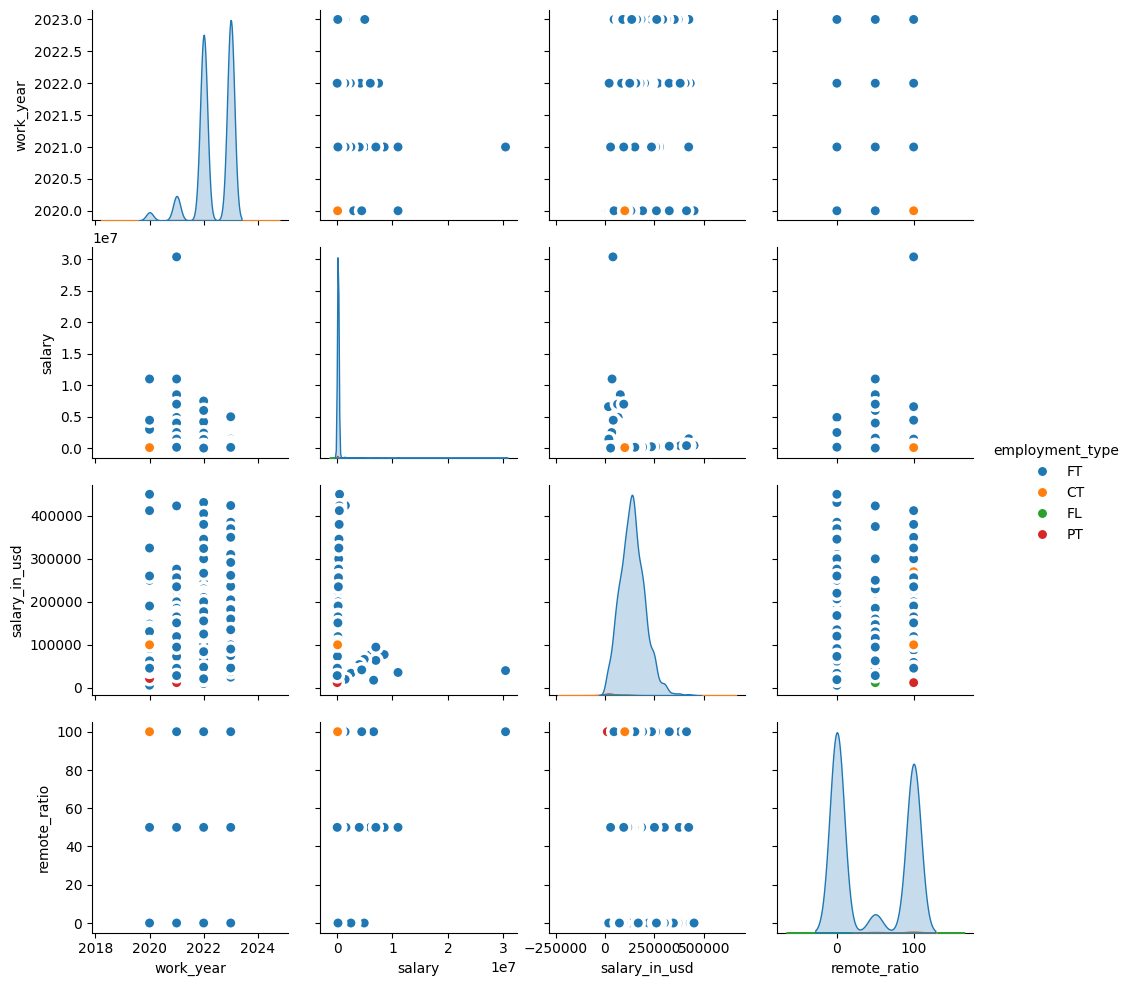

In [12]:
sns.pairplot(df, kind='scatter', hue='employment_type',
            plot_kws=dict(s=80, edgecolor='white',linewidth=2.5));

## Hipótesis

### Estadísticas

**Hipótesis 1 :**

Los salarios de los puestos de trabajos relacionados con data science son mayores que los de otros sectores con mismo nivel educativo.

**Hipótesis 2 :**

Dentro del sector data science ¿Son iguales los salarios entre hombres y mujeres con el mismo puesto de trabajo y nivel educativo?


**Hipótesis 3 :**

Dentro del sector Data Science ¿Existe una relación positiva entre los años de experiencia y el salario?

### Gráficamente

1. 
2. 
3. 
4. 

## Limpieza

In [13]:
df.drop(df[['salary','salary_currency']], axis = 1, inplace = True)
# quito esas dos columnas para quedarme solo con los salarios en $

In [14]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [15]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


Siglas experience level:

EN, which refers to Entry-level / Junior.

MI, which refers to Mid-level / Intermediate.

SE, which refers to Senior-level / Expert.

EX, which refers to Executive-level / Director.

employment_type:

PT : Part-time

FT : Full-time

CT : Contract

FL : Freelance

## Analisis
https://www.kaggle.com/code/arnabchaki/eda-on-data-science-salaries

https://www.kaggle.com/code/ozgurbayram00/data-science-salaries-advanced-eda


Estos dos son del otro data set:
https://www.kaggle.com/code/ishantgargml/salary-data-eda-with-challenges#Task:-Is-there-any-relation-between-YOE-and-Salary?
https://www.kaggle.com/code/tsungchechiang/salary-analysis-what-truly-matters#%F0%9F%93%8A-Part-4.-Looking-into-Genders

### Analsis Univariante


- teorema limite central  (med, mod, median)
- muestra media moda y median y sus distribuciones
- distribución por especie
- conteo de valores por especies y % del total
- distrib sexos
- graficar desv estandar y varienza
distribuciones rango, max, min

**VARIABLES CUALITATIVAS**

Employment level:

In [16]:
df.experience_level.value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

In [17]:
df.experience_level.mode()

0    SE
Name: experience_level, dtype: object

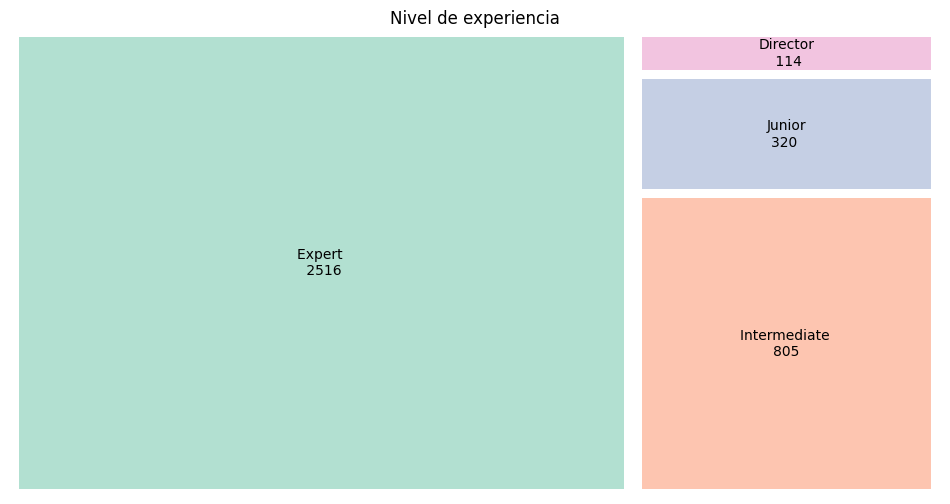

In [18]:
plt.figure(figsize=(12,6))
plt.axis('off')

exp_level_plot = squarify.plot(sizes = df['experience_level'].value_counts(), label=['Expert \n 2516','Intermediate \n805', 'Junior\n320 ', 'Director\n 114'], 
              alpha = 0.5, pad = True, color= sns.color_palette('Set2'))
exp_level_plot.set_title('Nivel de experiencia', );

In [19]:
df2 = df.copy()

In [20]:
df2['employment_type'] = df2['employment_type'].replace('PT','Part-Time')
df2['employment_type'] = df2['employment_type'].replace('FT','Full-Time')
df2['employment_type'] = df2['employment_type'].replace('CT','Contract')
df2['employment_type'] = df2['employment_type'].replace('FL','Freelance')

In [21]:
labels = df2['employment_type'].value_counts(normalize=True).to_dict()
labels

{'Full-Time': 0.9901464713715047,
 'Part-Time': 0.004527296937416778,
 'Contract': 0.002663115845539281,
 'Freelance': 0.002663115845539281}

<Figure size 1200x600 with 0 Axes>

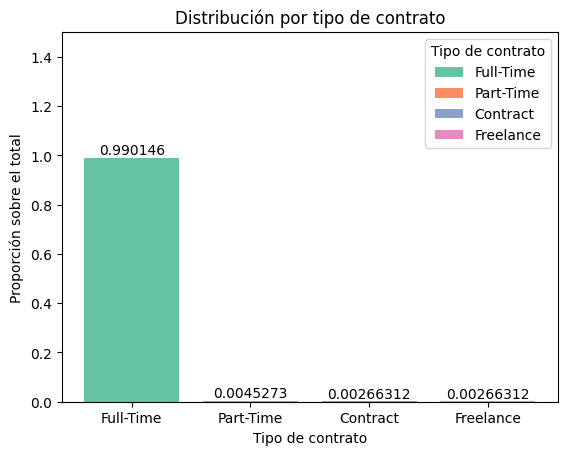

In [22]:
plt.figure(figsize=(12,6))
fig, ax = plt.subplots()
bar_labels = labels.keys()
employ_type_plot = plt.bar(labels.keys(), labels.values(), label = labels.keys(),color= sns.color_palette('Set2'));

ax.set_title('Distribución por tipo de contrato')
ax.legend(title='Tipo de contrato')
ax.set(ylabel='Proporción sobre el total', ylim=(0, 1.5))
ax.set(xlabel='Tipo de contrato')
bar_container = ax.bar(labels.keys(), labels.values(), color= sns.color_palette('Set2'))
ax.bar_label(bar_container,)
plt.show();

In [23]:
top_jobs = pd.DataFrame(df['job_title'].value_counts(normalize=True))
top_jobs.head(20)

,proportion
job_title,
Data Engineer,0.276964
Data Scientist,0.223702
Data Analyst,0.162983
Machine Learning Engineer,0.076964
Analytics Engineer,0.027430
Data Architect,0.026897
Research Scientist,0.021838
Data Science Manager,0.015446
Applied Scientist,0.015446


In [24]:
jobs = df['job_title'].value_counts()[:20].to_dict()

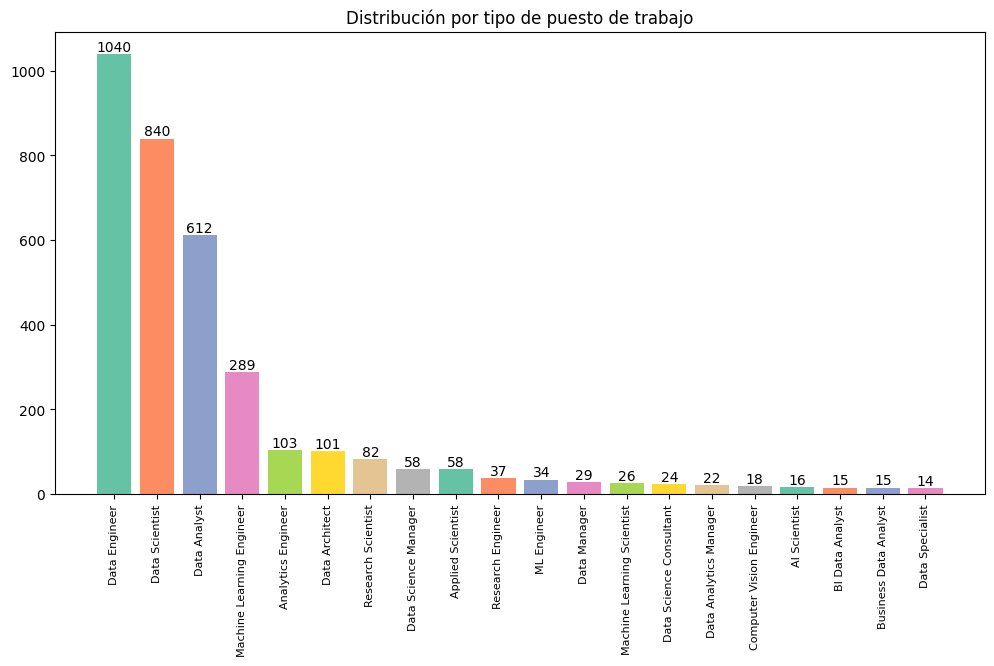

In [25]:
plt.figure(figsize=(12,6))
employ_name = plt.bar(jobs.keys(), jobs.values(), label = jobs.keys(),color= sns.color_palette('Set2'));

plt.title('Distribución por tipo de puesto de trabajo')
plt.xticks(rotation= 90, fontsize= 8)
bar_container = plt.bar(jobs.keys(), jobs.values(), color= sns.color_palette('Set2'))
plt.bar_label(bar_container,)

plt.show();



In [26]:
emply_res = pd.DataFrame(df['employee_residence'].value_counts()[:20])
emply_res.reset_index(inplace=True)

In [27]:
country_names = {
                    'US': 'Estados Unidos',
                    'GB': 'Reino Unido',
                    'CA': 'Canadá',
                    'ES': 'España',
                    'IN': 'India',
                    'DE': 'Alemania',
                    'FR': 'Francia',
                    'PT': 'Portugal',
                    'BR': 'Brasil',
                    'GR': 'Grecia',
                    'NL': 'Países Bajos',
                    'AU': 'Australia',
                    'MX': 'México',
                    'IT': 'Italia',
                    'PK': 'Pakistán',
                    'JP': 'Japón',
                    'IE': 'Irlanda',
                    'NG': 'Nigeria',
                    'AT': 'Austria',
                    'AR': 'Argentina'}

C:\Users\laura\AppData\Local\Temp\ipykernel_16888\648272376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=emply_res,x='employee_residence', y = 'count', palette= sns.color_palette('Set2'))
C:\Users\laura\AppData\Local\Temp\ipykernel_16888\648272376.py:3: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=emply_res,x='employee_residence', y = 'count', palette= sns.color_palette('Set2'))


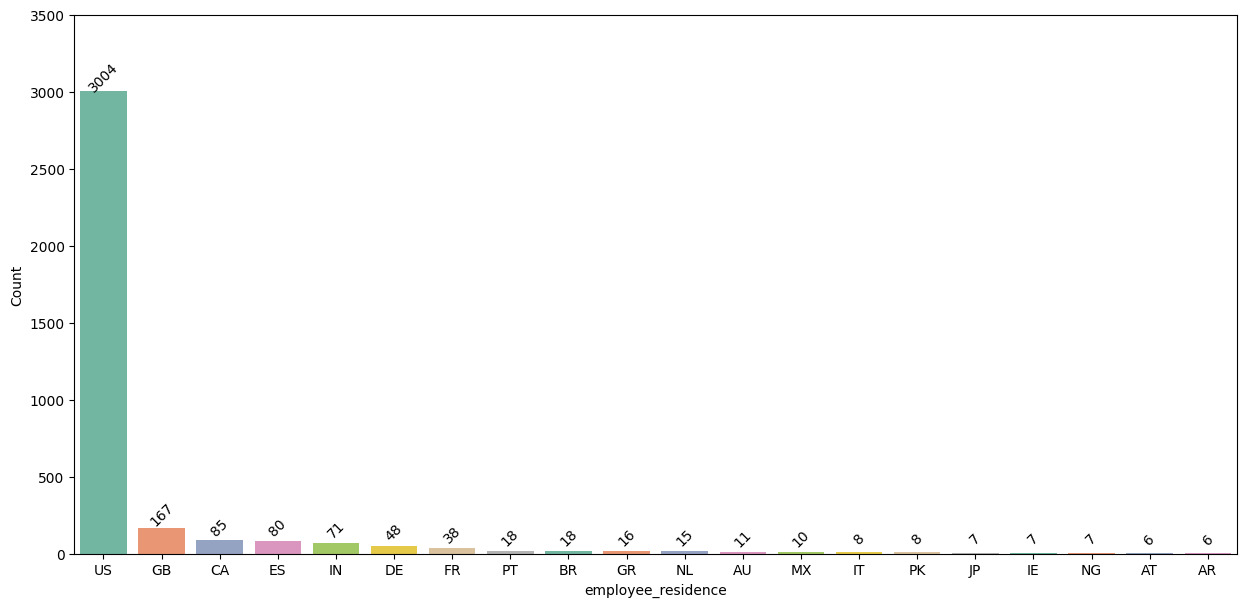

In [28]:
plt.figure(figsize=(15,7))

ax = sns.barplot(data=emply_res,x='employee_residence', y = 'count', palette= sns.color_palette('Set2'))
ax.set(ylabel='Count', ylim=(0, 3500))


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                rotation = 45,
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

In [30]:
comp_loc = pd.DataFrame(df['company_location'].value_counts()[:20])


C:\Users\laura\AppData\Local\Temp\ipykernel_16888\444802086.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=comp_loc,x='company_location', y = 'count', palette= sns.color_palette('Set2'))
C:\Users\laura\AppData\Local\Temp\ipykernel_16888\444802086.py:3: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=comp_loc,x='company_location', y = 'count', palette= sns.color_palette('Set2'))


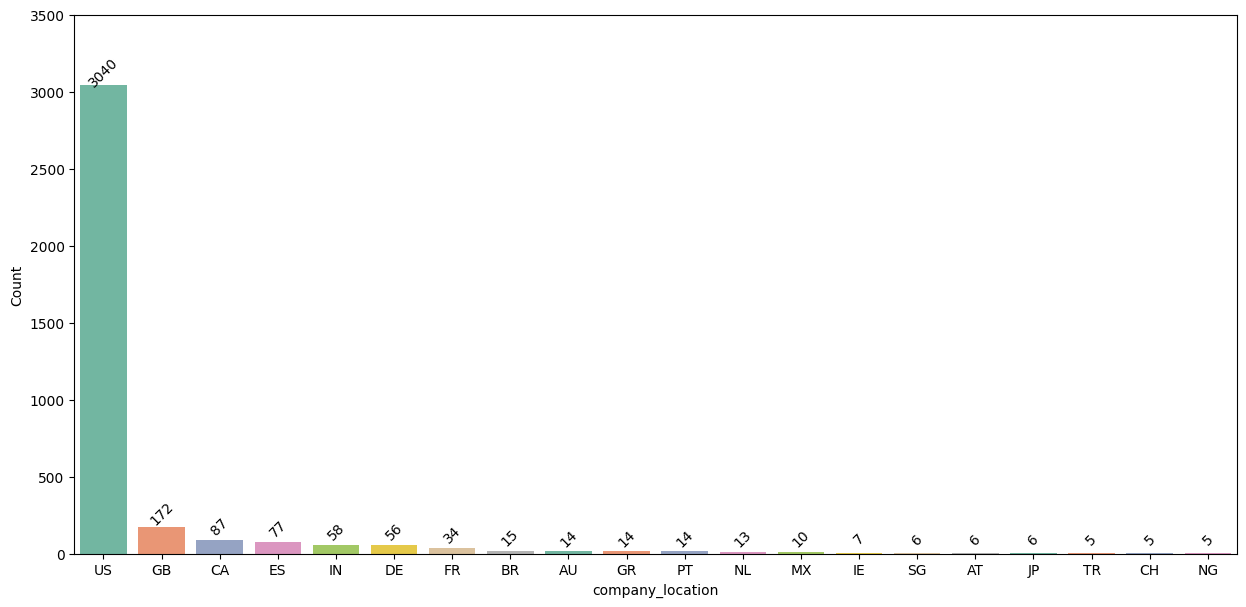

In [31]:
plt.figure(figsize=(15,7))

ax = sns.barplot(data=comp_loc,x='company_location', y = 'count', palette= sns.color_palette('Set2'))
ax.set(ylabel='Count', ylim=(0, 3500))


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                rotation = 45,
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

In [ ]:
top_remote_ratio_by_job = df.groupby('job_title')['remote_ratio'].max().nsmallest(20).reset_index()
print(top_remote_ratio_by_job)

                         job_title  remote_ratio
0   Business Intelligence Engineer             0
1        Data Analytics Specialist             0
2                        Data Lead             0
3       Data Management Specialist             0
4                     Data Modeler             0
5                  Data Strategist             0
6         Deep Learning Researcher             0
7                  Insight Analyst             0
8               Staff Data Analyst             0
9    Autonomous Vehicle Technician            50
10             Azure Data Engineer            50
11            Cloud Data Architect            50
12            Data DevOps Engineer            50
13          Data Science Tech Lead            50
14            Finance Data Analyst            50
15        Head of Machine Learning            50
16         Marketing Data Engineer            50
17              Power BI Developer            50
18   3D Computer Vision Researcher           100
19                  

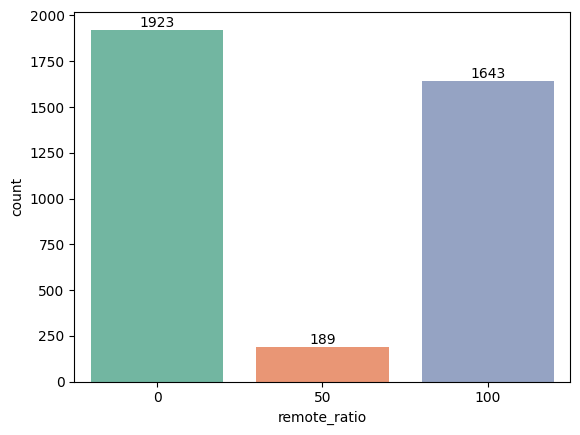

In [109]:
remote = df['remote_ratio'].value_counts()
plt.figure()
ax = sns.barplot(remote, palette=sns.color_palette('Set2'))

for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
sizes =df['company_size'].value_counts()
sizes

company_size
M    3153
L     454
S     148
Name: count, dtype: int64

C:\Users\laura\AppData\Local\Temp\ipykernel_19476\129211146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(sizes, palette=sns.color_palette('Set2'))
C:\Users\laura\AppData\Local\Temp\ipykernel_19476\129211146.py:2: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  ax = sns.barplot(sizes, palette=sns.color_palette('Set2'))


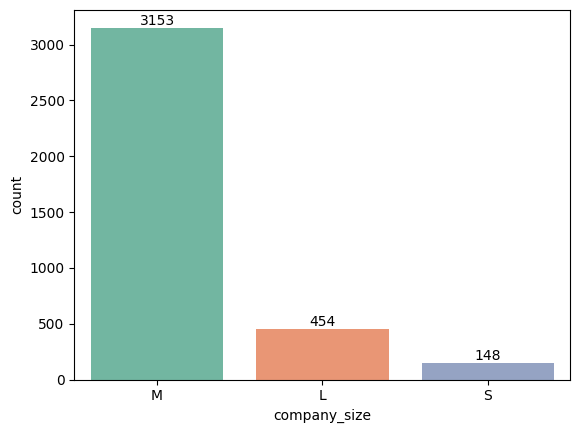

In [ ]:
plt.figure()
ax = sns.barplot(sizes, palette=sns.color_palette('Set2'))

for i in ax.containers:
    ax.bar_label(i,)

 sns.barplot method will return a list of sub methods. use containers method to access  the text label of each bar by passing it  through the ax.bar_label function use for loop to iterate through the list of labels and assign each bar to a different  label.

In [117]:
df.select_dtypes('object')

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
0,SE,FT,Principal Data Scientist,ESP,ESP,L
1,MI,CT,ML Engineer,USA,USA,S
2,MI,CT,ML Engineer,USA,USA,S
3,SE,FT,Data Scientist,CAN,CAN,M
4,SE,FT,Data Scientist,CAN,CAN,M
...,...,...,...,...,...,...
3750,SE,FT,Data Scientist,USA,USA,L
3751,MI,FT,Principal Data Scientist,USA,USA,L
3752,EN,FT,Data Scientist,USA,USA,S
3753,EN,CT,Business Data Analyst,USA,USA,L


In [114]:
country = coco.convert(names = df['employee_residence'], to = "ISO3")
df['employee_residence'] = country

In [116]:
country = coco.convert(names = df['company_location'], to = "ISO3")
df['company_location'] = country

In [119]:
residence = df['employee_residence'].value_counts()
px.choropleth(locations = residence.index,
                    color = residence.values,
                    color_continuous_scale=px.colors.sequential.Plotly3,
                    title = 'Employee Loaction On Map')


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'geo': 'geo',
              'hovertemplate': 'locations=%{location}<br>color=%{z}<extra></extra>',
              'locations': array(['USA', 'GBR', 'CAN', 'ESP', 'IND', 'DEU', 'FRA', 'PRT', 'BRA', 'GRC',
                                  'NLD', 'AUS', 'MEX', 'ITA', 'PAK', 'JPN', 'IRL', 'NGA', 'AUT', 'ARG',
                                  'POL', 'PRI', 'TUR', 'BEL', 'SGP', 'RUS', 'LVA', 'UKR', 'COL', 'CHE',
                                  'SVN', 'BOL', 'DNK', 'HRV', 'HUN', 'ROU', 'THA', 'ARE', 'VNM', 'HKG',
                                  'UZB', 'PHL', 'CAF', 'CHL', 'FIN', 'CZE', 'SWE', 'ASM', 'LTU', 'GHA',
                                  'KEN', 'DZA', 'NZL', 'JEY', 'MYS', 'MDA', 'IRQ', 'BGR', 'LUX', 'SRB',
                                  'HND', 'EST', 'TUN', 'CRI', 'IDN', 'EGY', 'DOM', 'CHN', 'SVK', 'IRN',
                                  'MAR', 'ISR', 'MKD', 'BIH', 'ARM', 'CYP', 'KWT', 'MLT'], dtype=object),
              'name': '',
              'type': 'choropleth',
              'z': array([3004,  167,   85,   80,   71,   48,   38,   18,   18,   16,   15,   11,
                            10,    8,    8,    7,    7,    7,    6,    6,    6,    5,    5,    5,
                             5,    4,    4,    4,    4,    4,    4,    3,    3,    3,    3,    3,
                             3,    3,    3,    2,    2,    2,    2,    2,    2,    2,    2,    2,
                             2,    2,    2,    1,    1,    1,    1,    1,    1,    1,    1,    1,
                             1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
                             1,    1,    1,    1,    1,    1], dtype=int64)}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'color'}},
                             'colorscale': [[0.0, '#0508b8'],
                                            [0.08333333333333333, '#1910d8'],
                                            [0.16666666666666666, '#3c19f0'],
                                            [0.25, '#6b1cfb'], [0.3333333333333333,
                                            '#981cfd'], [0.4166666666666667,
                                            '#bf1cfd'], [0.5, '#dd2bfd'],
                                            [0.5833333333333334, '#f246fe'],
                                            [0.6666666666666666, '#fc67fd'], [0.75,
                                            '#fe88fc'], [0.8333333333333334,
                                            '#fea5fd'], [0.9166666666666666,
                                            '#febefe'], [1.0, '#fec3fe']]},
               'geo': {'center': {}, 'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]}},
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Employee Loaction On Map'}}
})

**VARIABLES CUANTITATIVAS**

In [33]:
df.select_dtypes(exclude='object')

,work_year,salary_in_usd,remote_ratio
0,2023,85847,100
1,2023,30000,100
2,2023,25500,100
3,2023,175000,100
4,2023,120000,100
...,...,...,...
3750,2020,412000,100
3751,2021,151000,100
3752,2020,105000,100
3753,2020,100000,100


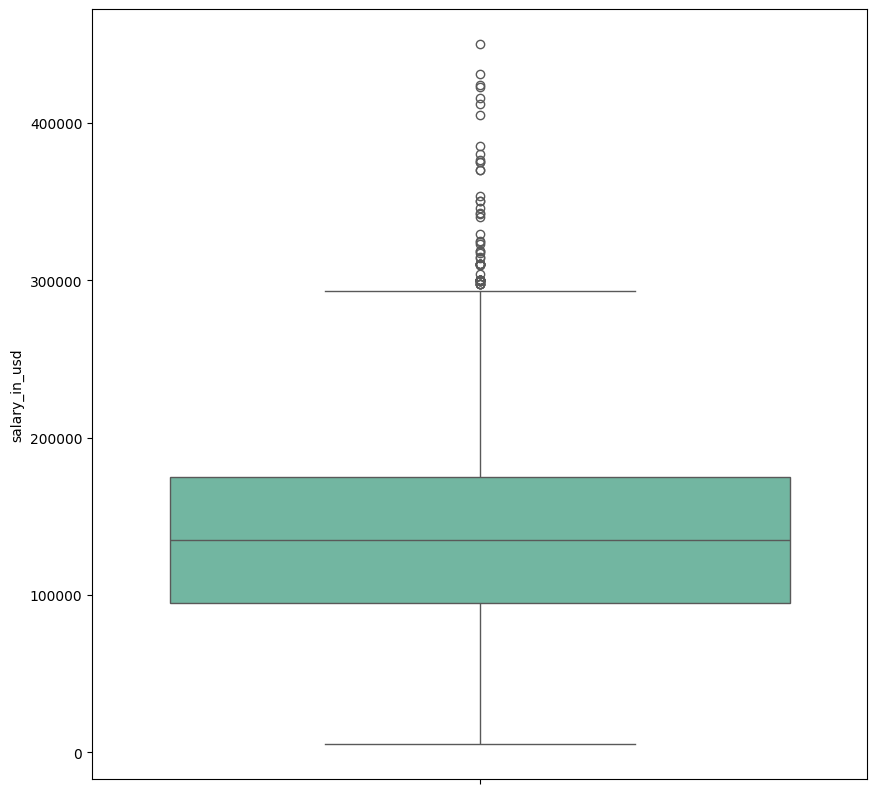

In [70]:
plt.figure(figsize=(10,10))

sns.boxplot(data= df['salary_in_usd'], palette=sns.color_palette('Set2'), legend= 'full');

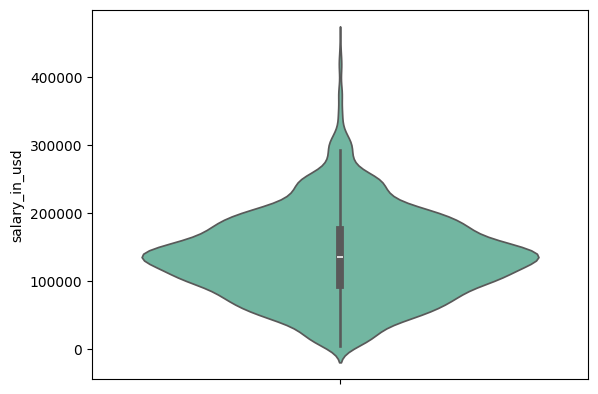

In [71]:
sns.violinplot(df['salary_in_usd'], palette=sns.color_palette('Set2'), inner = 'box');

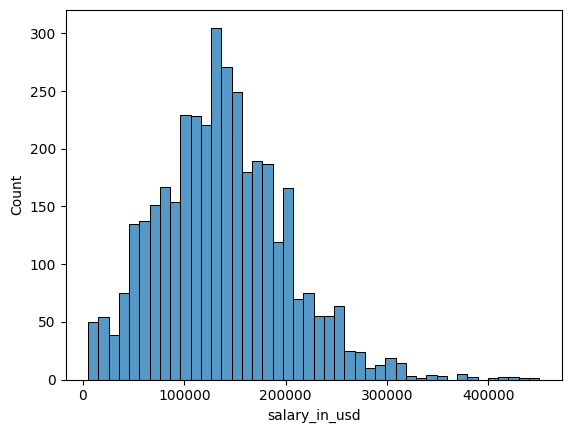

In [76]:
sns.histplot(df['salary_in_usd'], palette=sns.color_palette('Set2'));

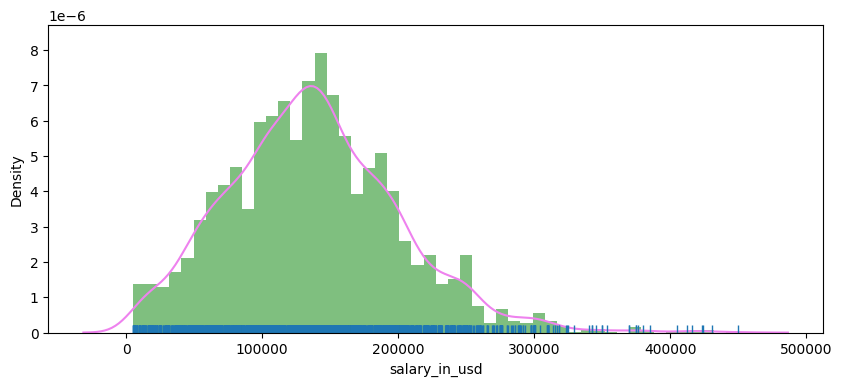

In [80]:
plt.figure(figsize=(10,4))
sns.distplot(df['salary_in_usd'],
            kde_kws={'color':'violet'},#color de la linea
            hist_kws={ 'linewidth':3,
                     'alpha':0.5, 'color':'g'},
            bins = 50,
            rug=True);

### Analsis Bivariante

In [81]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ESP,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USA,100,US,S
2,2023,MI,CT,ML Engineer,25500,USA,100,US,S
3,2023,SE,FT,Data Scientist,175000,CAN,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CAN,100,CA,M


In [93]:
loc= df['company_location'].value_counts()
top_15= loc[:20]
resid= df['employee_residence'].value_counts()
top_res= resid[:20]

In [106]:
data1 = pd.DataFrame((resid, top_15))
data1

,count,count
USA,3004.0,NaN
GBR,167.0,NaN
CAN,85.0,NaN
ESP,80.0,NaN
IND,71.0,NaN
...,...,...
AT,NaN,6.0
JP,NaN,6.0
TR,NaN,5.0
CH,NaN,5.0


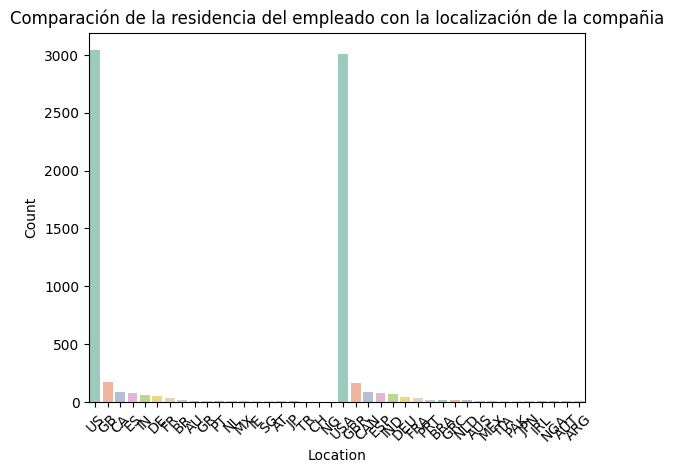

In [107]:

plt.figure()

sns.barplot(x=top_15.index, y=top_15.values, palette=sns.color_palette('Set2'), alpha=0.7, label='Employee Residence')
sns.barplot(x=top_res.index, y=top_res.values, palette=sns.color_palette('Set2'), alpha=0.7, label='Company Location')
# COMBIAR AMBOS

plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Comparación de la residencia del empleado con la localización de la compañia')


plt.xticks(rotation=45)

plt.show()

<Axes: xlabel='count', ylabel='count'>

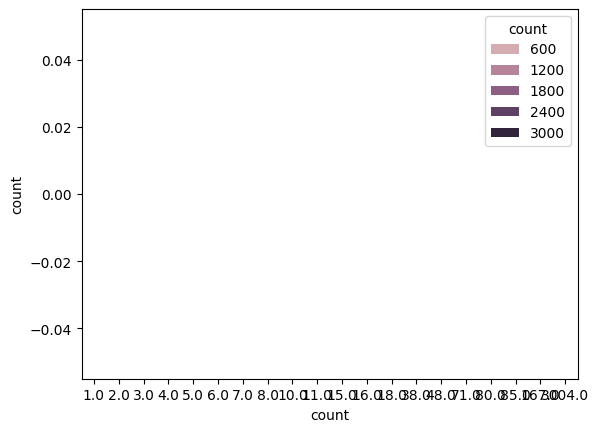

In [108]:
plt.figure()
sns.countplot(x=resid, data=df, hue = top_15)

### Analsis Multivariante

## HIPÓTESIS

In [34]:
df.drop(columns=list(df[df.columns[df.dtypes == 'object']].columns))

,work_year,salary_in_usd,remote_ratio
0,2023,85847,100
1,2023,30000,100
2,2023,25500,100
3,2023,175000,100
4,2023,120000,100
...,...,...,...
3750,2020,412000,100
3751,2021,151000,100
3752,2020,105000,100
3753,2020,100000,100


In [35]:
df[df.columns[df.dtypes == 'object']].columns
# esto es para saber por qué pongo columns al final. Da un indice.

Index(['experience_level', 'employment_type', 'job_title',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

In [36]:
df.select_dtypes(exclude=['object']).corr()
# otra forma más corta y directa, sin tener que hacer máscara

,work_year,salary_in_usd,remote_ratio
work_year,1.00000,0.228290,-0.236430
salary_in_usd,0.22829,1.000000,-0.064171
remote_ratio,-0.23643,-0.064171,1.000000


In [37]:
# salary.drop(columns=list(salary[salary.columns[salary.dtypes == 'object']]))
# esta es lo mismo que el anterior
# no es necesario pasarlo como lista
# salary.drop(columns=salary[salary.columns[salary.dtypes == 'object']])

In [38]:
df.dtypes == 'object'

work_year             False
experience_level       True
employment_type        True
job_title              True
salary_in_usd         False
employee_residence     True
remote_ratio          False
company_location       True
company_size           True
dtype: bool

In [39]:
df.columns[df.dtypes == 'object']

Index(['experience_level', 'employment_type', 'job_title',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

In [40]:
df[df.columns[df.dtypes == 'object']]

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
0,SE,FT,Principal Data Scientist,ES,ES,L
1,MI,CT,ML Engineer,US,US,S
2,MI,CT,ML Engineer,US,US,S
3,SE,FT,Data Scientist,CA,CA,M
4,SE,FT,Data Scientist,CA,CA,M
...,...,...,...,...,...,...
3750,SE,FT,Data Scientist,US,US,L
3751,MI,FT,Principal Data Scientist,US,US,L
3752,EN,FT,Data Scientist,US,US,S
3753,EN,CT,Business Data Analyst,US,US,L


In [41]:
list(df[df.columns[df.dtypes == 'object']].columns)

['experience_level',
 'employment_type',
 'job_title',
 'employee_residence',
 'company_location',
 'company_size']

In [42]:
list(df[df.columns[df.dtypes == 'object']])

['experience_level',
 'employment_type',
 'job_title',
 'employee_residence',
 'company_location',
 'company_size']